In [8]:
%matplotlib notebook

In [3]:
# load and summarize the housing dataset
import pandas as pd
import matplotlib.pyplot as plt
# load dataset
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/housing.csv'
df = pd.read_csv(url, header=None)

df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [4]:
import numpy as np

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import Lasso, ElasticNet, RidgeClassifier

In [97]:
"""
Set up the data
"""
data = df.values

X = data[:,:-1]
y = data[:,-1]

<IPython.core.display.Javascript object>


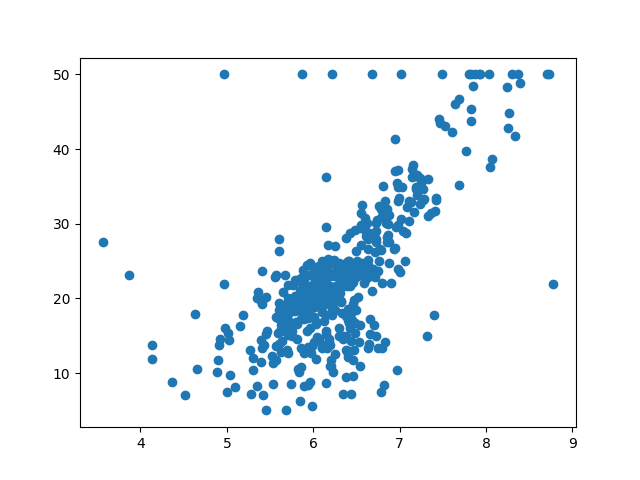

In [98]:
fig, ax = plt.subplots(1,1)

ax.scatter(X[:,5],y)

fig.show()

In [99]:
"""
Set up our model
"""

model = Lasso()

In [100]:
"""
Test using our own split of data
"""

X_train, y_train = X[:400,:], y[:400]
X_test, y_test = X[400:,:], y[400:]

In [101]:
"""
Fit our model
"""

model.fit(X_train, y_train)

Lasso()

In [102]:
model.coef_

array([-0.06672593,  0.04867329, -0.        ,  0.        , -0.        ,
        1.8287023 ,  0.02662454, -0.73154672,  0.36464622, -0.01739047,
       -0.6456581 ,  0.00861184, -0.78298032])

In [46]:
"""
Get predictions on test set
"""

y_pred = model.predict(X_test)

<IPython.core.display.Javascript object>


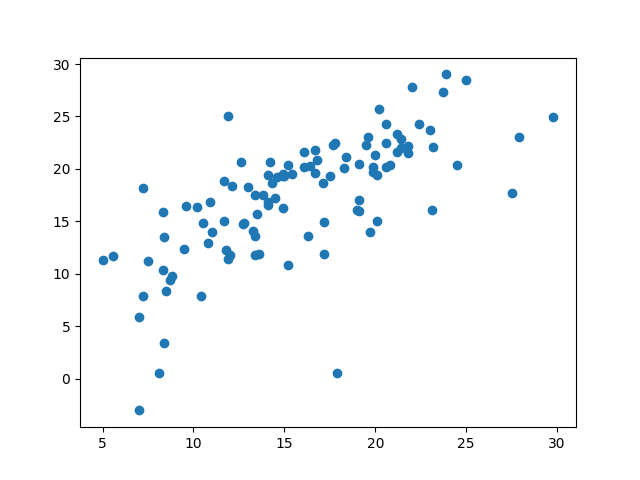

In [47]:
"""
Visualise predictions
"""

fig, ax = plt.subplots(1,1)

ax.scatter(y_test, y_pred)

fig.show()

<IPython.core.display.Javascript object>


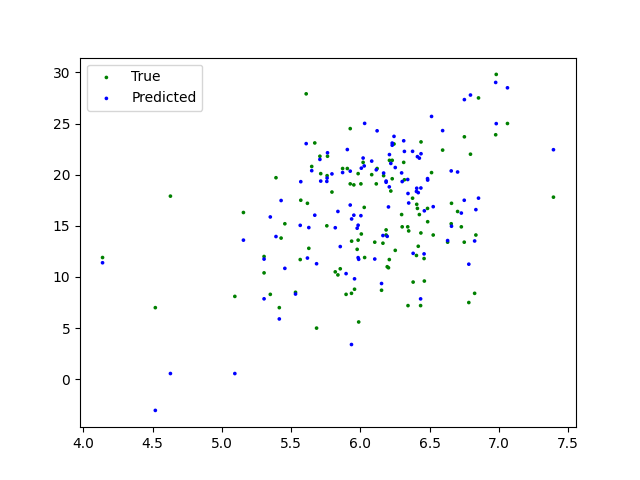

In [51]:
fig, ax = plt.subplots(1,1)

ax.scatter(X_test[:,5],y_test, c="g", s=7, ec=None, label="True")
ax.scatter(X_test[:,5],y_pred, c="b", s=7, ec=None, label="Predicted")

ax.legend()

fig.show()

In [53]:
"""
We can calculate the model performance ourselves
"""

np.abs(y_pred - y_test).mean()

3.6837239436958162

In [55]:
"""
Or use built in functions
"""

from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_test, y_pred)

3.6837239436958162

In [60]:
"""
Run our model using 10-fold cross validation
"""

cross_validator = RepeatedKFold(n_splits=10, n_repeats=1, random_state=42)

In [61]:
"""
Evaluate the model
"""

scores = cross_val_score(model, X, y, scoring="neg_mean_absolute_error", cv=cross_validator)

In [62]:
scores

array([-3.24780042, -3.26685218, -4.24064804, -3.81857719, -3.72774371,
       -3.44445375, -4.03632403, -4.0051066 , -3.40436492, -3.8720572 ])

In [107]:
"""
Now let's try a classifier
"""

from sklearn.datasets import make_classification

In [142]:
X, y = make_classification(n_samples=150, n_features=10)

In [109]:
"""
Let's see what features are useful
"""

from mrmr import mrmr_classif

relevant_features = mrmr_classif(X,y,8)
print(relevant_features)

100%|██████████| 8/8 [00:04<00:00,  1.96it/s]

[5, 7, 1, 6, 9, 8, 4, 2]


In [143]:
"""
Just take the mose relevant features
"""

X_relevant = X[:,relevant_features]

In [144]:
X_relevant.shape

(150, 8)

In [145]:
"""
Do the train/test split
"""

X_train, y_train = X_relevant[:100,:], y[:100]
X_test, y_test = X_relevant[100:,:], y[100:]

In [146]:
"""
Make a classifier
"""
from sklearn.ensemble import RandomForestClassifier as rfc
from sklearn.feature_selection import RFE

model = rfc()

selector = RFE(model, n_features_to_select=5, step=1)
selector = selector.fit(X_train, y_train)

In [147]:
selector.support_

array([ True,  True,  True,  True, False, False, False,  True])

In [148]:
selector.ranking_

array([1, 1, 1, 1, 4, 2, 3, 1])

In [149]:
selected_features = np.where(selector.support_)[0]; selected_features

array([0, 1, 2, 3, 7])

In [150]:
"""
Reduce features further
"""

X_train = X_train[:,selected_features]
X_test = X_test[:,selected_features]

In [151]:
"""
Fit a classifier to the remaining features
"""

model = rfc()
model.fit(X_train, y_train)

RandomForestClassifier()

In [152]:
"""
Predict values on the test set
"""

y_pred = model.predict(X_test)
y_pred

array([0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 0])

In [153]:
y_test

array([1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 0])

In [154]:
y_pred_proba = model.predict_proba(X_test)
y_pred_proba

array([[0.7 , 0.3 ],
       [0.25, 0.75],
       [0.99, 0.01],
       [0.05, 0.95],
       [0.12, 0.88],
       [0.96, 0.04],
       [0.21, 0.79],
       [0.1 , 0.9 ],
       [0.94, 0.06],
       [0.04, 0.96],
       [0.  , 1.  ],
       [0.64, 0.36],
       [0.07, 0.93],
       [0.7 , 0.3 ],
       [0.45, 0.55],
       [0.23, 0.77],
       [0.98, 0.02],
       [0.01, 0.99],
       [0.52, 0.48],
       [0.77, 0.23],
       [1.  , 0.  ],
       [0.75, 0.25],
       [0.46, 0.54],
       [0.01, 0.99],
       [0.54, 0.46],
       [0.75, 0.25],
       [0.8 , 0.2 ],
       [0.13, 0.87],
       [0.02, 0.98],
       [0.02, 0.98],
       [0.56, 0.44],
       [0.14, 0.86],
       [0.69, 0.31],
       [1.  , 0.  ],
       [0.95, 0.05],
       [0.45, 0.55],
       [0.01, 0.99],
       [0.89, 0.11],
       [0.01, 0.99],
       [0.67, 0.33],
       [0.06, 0.94],
       [0.4 , 0.6 ],
       [0.03, 0.97],
       [0.97, 0.03],
       [0.1 , 0.9 ],
       [0.92, 0.08],
       [0.02, 0.98],
       [0.04,

In [155]:
"""
Compute and plot an ROC curve
"""

from sklearn.metrics import roc_curve

fpr, tpr, _ = roc_curve(y_test, y_pred_proba[:,1])

<IPython.core.display.Javascript object>


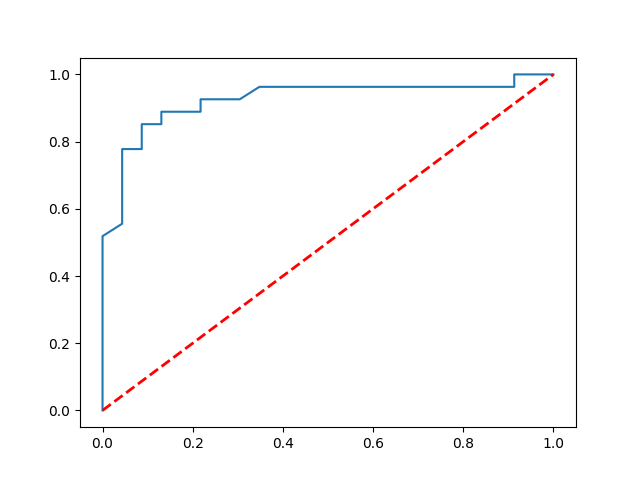

In [157]:
fig,ax = plt.subplots(1,1)

ax.plot(fpr, tpr)

ax.plot([0,1],[0,1],c='r', lw=2, ls='--')

fig.show()

In [ ]:
from sklearn.m

In [ ]:
"""
Implementing the Gabor edge filter in SimpleITK
"""

gis = sitk.GaborImageSource()
gis.SetFrequency(1/np.sqrt(2)) # This should be the same as the paper?
# gis.SetDirection( # Need a list of numbers here )
#  a b c
#  d e f
#  h i j
#     --> (a, b, c, d, e, f, g, h, i, j)
# (1,0,0,0,1,0,0,0,1) and (0,-1,0,1,0,0,0,0,1)
gis.SetSize((10,10,10)) # Play around with this

test = gis.Execute()

test_conv = sitk.FFTConvolution(
    sitk.Cast(img, sitk.sitkFloat64),
    sitk.Cast(test, sitk.sitkFloat64)
)